In [1]:
import numpy as np
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [24]:
i= pd.read_csv('data_banknote_authentication.csv', names = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"])
i.tail(20)

,Variance,Skewness,Kurtosis,Entropy,Class
1352,1.489600,3.42880,-4.030900,-1.425900,1
1353,0.115920,3.22190,-3.430200,-2.845700,1
1354,-3.392400,3.35640,-0.720040,-3.523300,1
1355,-6.163200,8.70960,-0.216210,-3.634500,1
1356,-4.078600,2.92390,0.870260,-0.653890,1
1357,-2.589900,-0.39110,0.934520,0.429720,1
1358,-1.011600,-0.19038,-0.905970,0.003003,1
1359,0.066129,2.49140,-2.940100,-0.621560,1
1360,-0.247450,1.93680,-2.469700,-0.805180,1
1361,-1.573200,1.06360,-0.712320,-0.838800,1


In [67]:
i.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


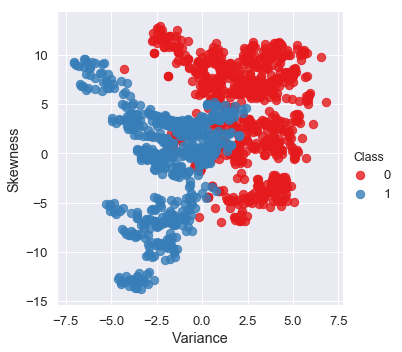

In [25]:
sns.lmplot('Variance', 'Skewness', data=i, hue='Class', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [29]:
# format or preprocess data
type_label = np.where(i['Class']==0, 0, 1)
i_features= i.columns.values[:4].tolist()
i_features

['Variance', 'Skewness', 'Kurtosis', 'Entropy']

In [41]:
var=i[['Variance', 'Skewness']].values
var

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

In [32]:
print(var)

[[  3.6216    8.6661 ]
 [  4.5459    8.1674 ]
 [  3.866    -2.6383 ]
 ...
 [ -3.7503  -13.4586 ]
 [ -3.5637   -8.3827 ]
 [ -2.5419   -0.65804]]


In [37]:
i[i_features].values

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [43]:
#fit model 
model=svm.SVC(kernel='linear')
model.fit(var, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
# get the sepdarting hyperplane
w = model.coef_[0] #2 diff coef
a= -w[0]/w[1] #the slope
xx=np.linspace(-5, 5) #numpy array between 30 and 60
yy=a*xx - (model.intercept_[0])/w[1]
print(yy) 

[ 19.21690177  18.5180882   17.81927463  17.12046106  16.42164749
  15.72283392  15.02402035  14.32520678  13.62639321  12.92757964
  12.22876607  11.5299525   10.83113893  10.13232536   9.43351179
   8.73469822   8.03588466   7.33707109   6.63825752   5.93944395
   5.24063038   4.54181681   3.84300324   3.14418967   2.4453761
   1.74656253   1.04774896   0.34893539  -0.34987818  -1.04869175
  -1.74750532  -2.44631889  -3.14513246  -3.84394602  -4.54275959
  -5.24157316  -5.94038673  -6.6392003   -7.33801387  -8.03682744
  -8.73564101  -9.43445458 -10.13326815 -10.83208172 -11.53089529
 -12.22970886 -12.92852243 -13.627336   -14.32614957 -15.02496314]


In [60]:
#plot the parallels to the separating hyperplane that pass through the support vector
b=model.support_vectors_[0]
yy_down=a*xx + (b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])
print(yy_up)

[ 19.86083155  19.16201798  18.46320441  17.76439084  17.06557727
  16.3667637   15.66795014  14.96913657  14.270323    13.57150943
  12.87269586  12.17388229  11.47506872  10.77625515  10.07744158
   9.37862801   8.67981444   7.98100087   7.2821873    6.58337373
   5.88456016   5.18574659   4.48693302   3.78811946   3.08930589
   2.39049232   1.69167875   0.99286518   0.29405161  -0.40476196
  -1.10357553  -1.8023891   -2.50120267  -3.20001624  -3.89882981
  -4.59764338  -5.29645695  -5.99527052  -6.69408409  -7.39289766
  -8.09171122  -8.79052479  -9.48933836 -10.18815193 -10.8869655
 -11.58577907 -12.28459264 -12.98340621 -13.68221978 -14.38103335]


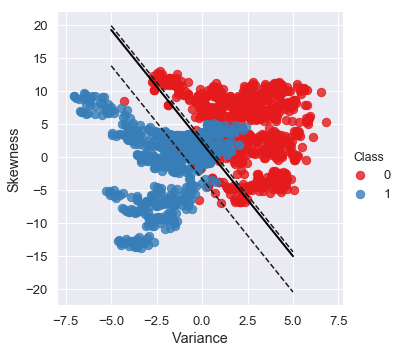

In [61]:
sns.lmplot('Variance', 'Skewness', data=i, hue='Class', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [63]:
def banknote (flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print ('The given  banknote is authentic!')
    else: 
        print('The given banknote is inauthentic!')
            
#predict 
banknote(2.03,1.67)

The given  banknote is authentic!


In [66]:
def banknote (flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print ('The given  banknote is authentic!')
    else: 
        print('The given banknote is inauthentic!')
            
#predict 
banknote(0,2)

The given banknote is inauthentic!
